In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import math

In [3]:
df = pd.read_csv('D:/ML/comp/Medical Price Dataset.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info() # We observe that we have no null entries thus data cleaning is not required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['Bin_sex'] = df['sex'].apply(lambda x: 0 if x=='male' else 1)
df['Bin_smoker'] = df['smoker'].apply(lambda x: 0 if x=='yes' else 1)

In [6]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
df['Enc_region'] = df['region'].apply(lambda x: 0 if x=='northeast' else( 1 if x=='northwest' else( 2 if x=='southwest' else 2)))
df.head(10)

,age,sex,bmi,children,smoker,region,charges,Bin_sex,Bin_smoker,Enc_region
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,2
1,18,male,33.770,1,no,southeast,1725.55230,0,1,2
2,28,male,33.000,3,no,southeast,4449.46200,0,1,2
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1
5,31,female,25.740,0,no,southeast,3756.62160,1,1,2
6,46,female,33.440,1,no,southeast,8240.58960,1,1,2
7,37,female,27.740,3,no,northwest,7281.50560,1,1,1
8,37,male,29.830,2,no,northeast,6406.41070,0,1,0
9,60,female,25.840,0,no,northwest,28923.13692,1,1,1


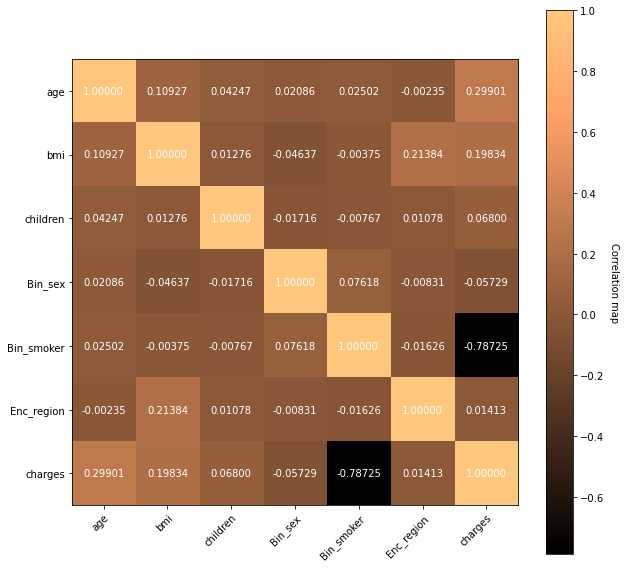

In [8]:
features = ['age', 'bmi', 'children', 'Bin_sex', 'Bin_smoker', 'Enc_region', 'charges']
fig, ax = plt.subplots(figsize=(10,10)) 
im = ax.imshow(df[features].corr(),matplotlib.cm.copper)
ax.set_xticks(np.arange(len(features)), labels=features)
ax.set_yticks(np.arange(len(features)), labels=features)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

cbar = ax.figure.colorbar(im, ax=ax) 
cbar.ax.set_ylabel("Correlation map", rotation=-90, va="bottom")

corr_mat = np.array(df[features].corr())
for i in range(len(features)):
    for j in range(len(features)):
        text = ax.text(j, i,"{:.5f}".format(corr_mat[i][j]) ,ha="center", va="center", color="w")

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='Bin_smoker', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='Bin_smoker', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='Bin_smoker'>,
        <AxesSubplot:xlabel='bmi', ylabel='Bin_smoker'>,
        <AxesSubplot:xlabel='Bin_smoker', ylabel='Bin_smoker'>,
        <AxesSubplot:xlabel='charges', ylabel='Bin_smoker'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='Bin_smoker', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

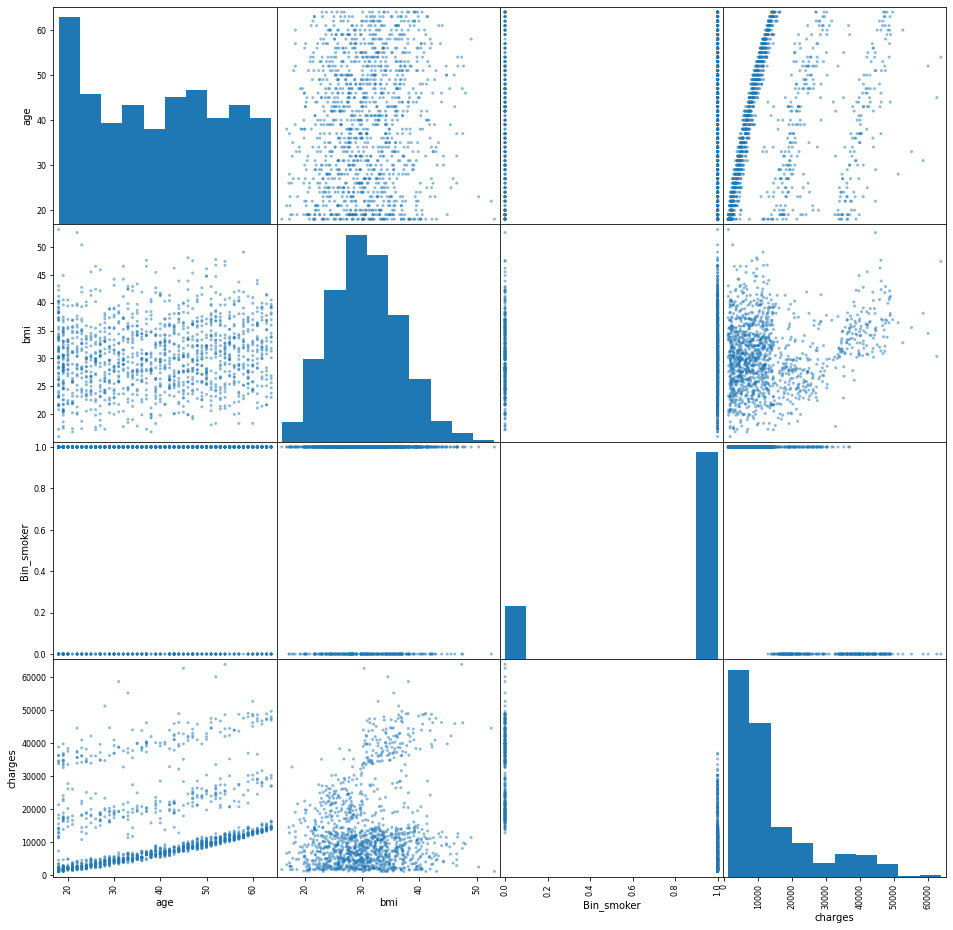

In [9]:
pd.plotting.scatter_matrix(df[['age','bmi','Bin_smoker','charges']], figsize=(16, 16))

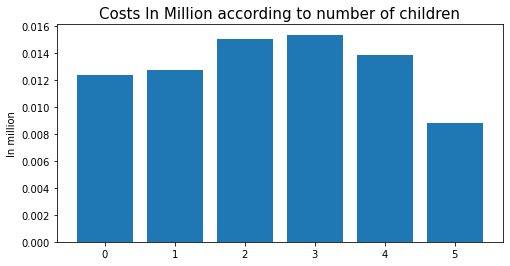

In [14]:
child_cost= df.groupby('children')['charges'].mean() * 1e-6
fig = plt.figure(figsize=(8,4))
plt.bar(child_cost.index,child_cost.values)
plt.title('Average Costs In Million according to number of children' ,size = 15)
plt.ylabel('In million')
plt.show()

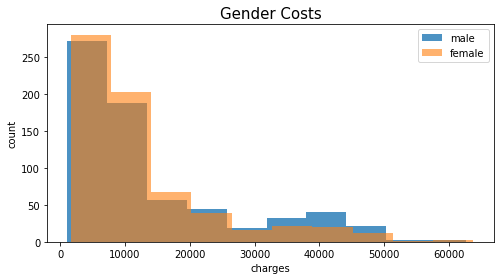

In [21]:
fig = plt.figure(figsize=(8,4))
plt.hist(data =df[df['sex'] =='male'] ,  x = 'charges' ,label = 'male', alpha = 0.8 )
plt.hist(data =df[df['sex'] =='female'] ,  x = 'charges',label = 'female' ,alpha = 0.6)
plt.title('Gender Costs',size = 15)
plt.ylabel('count')
plt.xlabel('charges')
plt.legend()
plt.show() 
# It seems male and female have similar medical costs 

In [61]:
class multipleLinearRegression():

  def __init__(self):
    #No instance Variables required
    pass

  def forward(self,X,y,W):
    """
    Parameters:
    X (array) : Independent Features
    y (array) : Dependent Features/ Target Variable
    W (array) : Weights 

    Returns:
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    y_pred (array) : Predicted Target Variable
    """
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):
    """
    Parameters:
    X (array) : Independent Features
    y_pred (array) : Predicted Target Variable
    y_true (array) : Dependent Features/ Target Variable
    W (array) : Weights
    alpha (float) : learning rate
    index (int) : Index to fetch the corresponding values of W, X and y 

    Returns:
    W (array) : Update Values of Weight
    """
    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W

  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    """
    Parameters:
    X (array) : Independent Feature
    y (array) : Dependent Features/ Target Variable
    epochs (int) : Number of epochs for training, default value is 10
    alpha (float) : learning rate, default value is 0.001

    Returns:
    y_pred (array) : Predicted Target Variable
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    """

    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns 
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):
    """
    Parameters:
    X_test (array) : Independent Features from the Test Set
    y_test (array) : Dependent Features/ Target Variable from the Test Set
    W_trained (array) : Trained Weights
    test_indices (list) : Index to fetch the corresponding values of W_trained,
                          X_test and y_test 

    Returns:
    test_pred (list) : Predicted Target Variable
    test_loss (list) : Calculated Sqaured Error Loss for y and y_pred
    """
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss
    

  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

  def plotLoss(self, loss, epochs):
    """
    Parameters:
    loss (list) : Calculated Sqaured Error Loss for y and y_pred
    epochs (list): Number of Epochs

    Returns: None
    Plots a graph of Loss vs Epochs
    """
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()

def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [122]:
df.drop(df.query('bmi > 50 ').index ,axis= 0 ,inplace=True)
df.drop(df.query('charges > 50000 ').index  ,axis= 0 ,inplace=True)
dfcpy = df[['age','bmi','Bin_smoker','Enc_region','charges']]

dfcpy['age'] = np.log1p(df['age']) #normalizing data by using function y = loge(1+x)
dfcpy['bmi'] = np.log1p(df['bmi'])

training_data = dfcpy.sample(frac=0.5, random_state=41)
testing_data = dfcpy.drop(training_data.index)

X_train = training_data.iloc[:,:-1].values
y_train = training_data.iloc[:,-1].values

X_test = testing_data.iloc[:,:-1].values
Y_test = testing_data.iloc[:,-1].values

dfcpy.head(10)


C:\Users\hp\AppData\Local\Temp\ipykernel_48184\3212618568.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcpy['age'] = np.log1p(df['age'])
C:\Users\hp\AppData\Local\Temp\ipykernel_48184\3212618568.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcpy['bmi'] = np.log1p(df['bmi'])


,age,bmi,Bin_smoker,Enc_region,charges
0,2.995732,3.363842,0,2,16884.92400
1,2.944439,3.548755,1,2,1725.55230
2,3.367296,3.526361,1,2,4449.46200
3,3.526361,3.165686,1,1,21984.47061
4,3.496508,3.397189,1,1,3866.85520
5,3.465736,3.286161,1,2,3756.62160
6,3.850148,3.539219,1,2,8240.58960
7,3.637586,3.358290,1,1,7281.50560
8,3.637586,3.428488,1,0,6406.41070
9,4.110874,3.289893,1,1,28923.13692


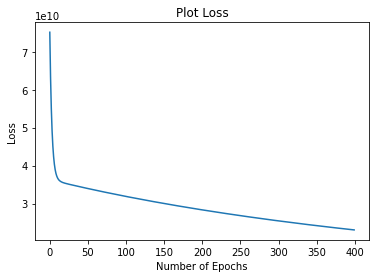

In [123]:
regressor = multipleLinearRegression()
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=400, alpha=0.00001)
test_pred, test_loss = regressor.test(X_test, Y_test, W_trained)
regressor.plotLoss(train_loss, num_epochs)

Accuracy: 0.9717034548497845


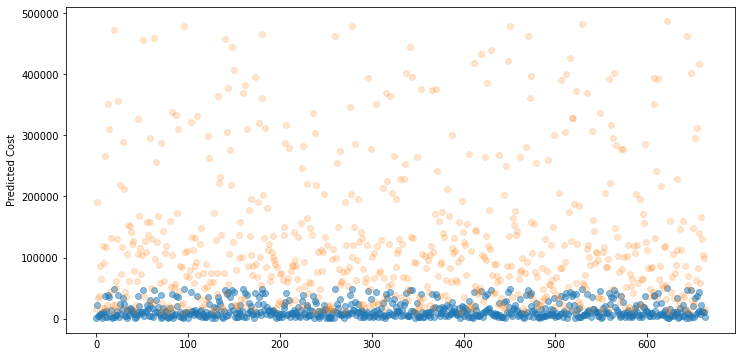

In [128]:
accu = r2_score(Y_test, test_pred)
print("Accuracy:", accu)

fig = plt.figure(figsize=(12,6))
plt.scatter([i for i in range(len(Y_test))],Y_test,alpha=0.5)
plt.scatter([i for i in range(len(Y_test))],test_pred,alpha=0.2)
plt.ylabel('Predicted Cost')
plt.show() 
